<a href="https://colab.research.google.com/github/jazaineam1/nopara/blob/main/Cuadernos/correlaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test de Correlación**

Las correlaciones, ya sea la de Pearson, la de Kendall o la de Spearman, tienen la intención de cuantificar la relación entre dos variables en un conjunto de datos.

1. **Correlación de Pearson**:
   - Esta correlación busca medir la fuerza y la dirección de la relación lineal entre dos variables cuantitativas.
   - Se utiliza principalmente para determinar si existe una relación significativa entre las dos variables y, en caso afirmativo, la fuerza de esa relación.
   - Es útil para comprender cómo cambia una variable cuando la otra variable cambia en una dirección específica.
  - El coeficiente de correlación de Pearson varía entre -1 y .
Un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica ausencia de correlación lineal.
  - Requiere que las variables sean cuantitativas y que la relación entre ellas sea lineal

2. **Correlación de Kendall (Tau de Kendall)**:
   - La intención de esta correlación es evaluar la concordancia o discordancia en el orden de los datos de dos variables ordinales o cuantitativas.
   - Es particularmente útil cuando los datos pueden no cumplir con los supuestos de la correlación de Pearson, como cuando hay valores atípicos o cuando la relación entre las variables no es lineal.
   - Kendall's Tau varía entre -1 y 1, donde 1 indica una concordancia perfecta, -1 indica una discordancia perfecta y 0 indica ausencia de relación.

3. **Correlación de Spearman (Rho de Spearman)**:
   - Similar a la de Kendall, esta correlación evalúa la relación de ordenación entre dos variables, pero no asume que la relación sea lineal.
   - Se utiliza para determinar si existe una asociación monotónica entre las dos variables, es decir, si una variable tiende a aumentar o disminuir cuando la otra variable lo hace.
   - Es especialmente útil cuando los datos no siguen una distribución normal y cuando hay valores atípicos presentes en los datos.
   - Varía entre -1 y 1, donde 1 indica una correlación perfecta positiva, -1 indica una correlación perfecta negativa y 0 indica ausencia de correlación monotónica.

**Diferencias entre Kendall y Spearman**

**Aplicabilidad:**

Kendall: Es más adecuada para variables ordinales y es menos sensible a valores atípicos en los datos. Es útil cuando las variables no cumplen con los supuestos de normalidad y linealidad requeridos por la correlación de Pearson.
Spearman: Aunque también es adecuada para variables ordinales, la correlación de Spearman es más general y se puede aplicar a variables cuantitativas. Además, es más robusta que la correlación de Pearson frente a valores atípicos y no linealidades en los datos.

**Interpretación:**

Kendall: Evalúa la concordancia o discordancia en el orden de los datos entre las dos variables, sin considerar la magnitud de las diferencias.
Spearman: Evalúa la relación de ordenación entre las variables y tiene en cuenta la magnitud de las diferencias entre los valores de las variables.

## Pearson
El coeficiente de correlación de Pearson, también conocido como correlación del momento del producto de Pearson, estima la correlación poblacional ρ. La prueba evalúa H0: ρ = 0 y construye un intervalo de confianza (1−α)% alrededor de r:

$$ r = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2 \sum_{i=1}^{n}(Y_i - \bar{Y})^2}} $$

El valor de r oscila entre -1 (relación lineal perfectamente negativa) y +1 (relación lineal perfectamente positiva), y r=0 cuando no hay relación lineal. Una correlación en el rango (0.1, 0.3) se considera pequeña, (0.3, 0.5) es mediana y (0.5, 1.0) es grande.

Solo se debe usar la correlación de Pearson cuando:

- Las variables son intervalares o de razón.
- Las variables están distribuidas normalmente.
- Las variables están relacionadas linealmente.
- Hay mínimos valores atípicos (o se eliminan por completo).
- Los residuos son homocedásticos.

La prueba de H0: ρ = 0 utiliza el estadístico de prueba $$ T = \frac{r \cdot \sqrt{n-2}}{\sqrt{1-r^2}} $$


**Ejemplo de Correlación del Momento del Producto de Pearson:**
El conjunto de datos "nascard" consta de 898 carreras de 1975 a 2003. En la carrera 1 de 1975, ¿cuál fue la correlación entre la posición de finalización del conductor y el premio?

Revisar la información aquí https://jse.amstat.org/v14n3/datasets.winner.html

In [1]:
library(dplyr)
nascard <- read.fwf(file = url("http://jse.amstat.org/datasets/nascard.dat.txt"),
                    widths = c(5, 6, 4, 4, 4, 5, 9, 4, 11, 30),
                    col.names = c('series_race', 'year', 'race_year',
                                  'finish_pos', 'start_pos',
                                  'laps_comp', 'winnings', 'num_cars',
                                  'car_make', 'driver'))
nascard_sr1 <- nascard[nascard$series_race == 1,]
glimpse(nascard_sr1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 35
Columns: 10
$ series_race <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ year        <dbl> 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975…
$ race_year   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ finish_pos  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ start_pos   <dbl> 1, 2, 25, 27, 22, 35, 3, 21, 33, 10, 17, 24, 6, 28, 18, 11…
$ laps_comp   <dbl> 191, 191, 184, 183, 178, 175, 172, 168, 167, 166, 166, 148…
$ winnings    <dbl> 12035, 8135, 6535, 5035, 3835, 2885, 3185, 2485, 2335, 218…
$ num_cars    <dbl> 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35…
$ car_make    <chr> "Matador    ", "Mercury    ", "Chevrolet  ", "Dodge      "…
$ driver      <chr> "BobbyAllison                  ", "DavidPearson           …


In [2]:
cor.test(x = nascard_sr1$finish_pos,
         y = nascard_sr1$winnings,
         alternative = "two.sided",
         method = "pearson")


	Pearson's product-moment correlation

data:  nascard_sr1$finish_pos and nascard_sr1$winnings
t = -6.3181, df = 33, p-value = 3.795e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8608741 -0.5397193
sample estimates:
       cor 
-0.7398896 


Explora la relación con un diagrama de dispersión. Como era de esperar, hay una relación negativa entre la posición de finalización y las ganancias, pero no es lineal.

`geom_smooth()` using formula = 'y ~ x'


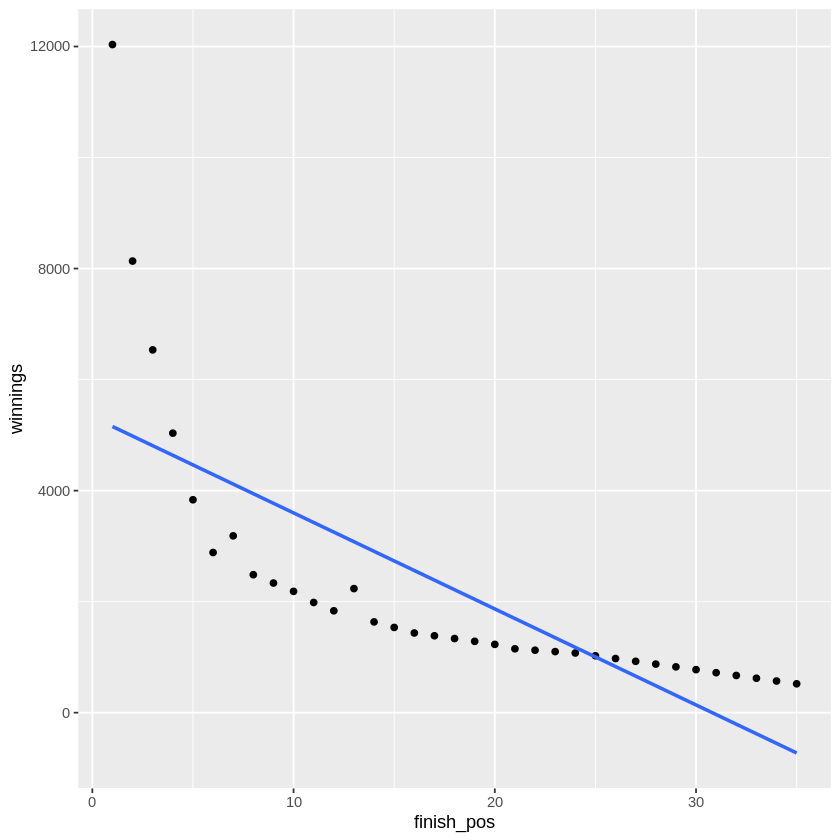

In [3]:
library(ggplot2)
ggplot(data = nascard_sr1, aes(x = finish_pos, y = winnings)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

## Spearman
El coeficiente de correlación de Spearman, denotado comúnmente como $\rho$ (rho), es una medida no paramétrica que evalúa la fuerza y dirección de la asociación entre dos variables clasificadas. A diferencia del coeficiente de correlación de Pearson, que mide relaciones lineales, Spearman puede detectar relaciones monótonas, ya sean lineales o no. Esto significa que si una variable aumenta, la otra tiende a aumentar (correlación positiva) o disminuir (correlación negativa), pero no necesariamente a un ritmo constante.

### Cálculo del Coeficiente de Spearman

El coeficiente de Spearman se calcula de la siguiente manera:

1. Ordena los valores de cada variable en orden ascendente y asigna a cada uno un rango. Si hay empates, asigna a cada uno el promedio de los rangos que habrían ocupado.
2. Calcula la diferencia de rangos ($d$) para cada par de observaciones.
3. Inserta las diferencias de rangos en la fórmula para calcular el coeficiente de Spearman:

$$ \rho = 1 - \frac{6 \sum d^2}{n(n^2 - 1)} $$

donde:
- $ \sum d^2 $ es la suma de los cuadrados de las diferencias de rangos,
- $ n $ es el número de observaciones.

### Interpretación

El coeficiente de Spearman varía entre -1 y +1.

- **+1**: Una correlación perfecta positiva. Si el valor de una variable aumenta, el valor de la otra variable también aumenta en una relación perfectamente predecible.
- **-1**: Una correlación perfecta negativa. Si el valor de una variable aumenta, el valor de la otra variable disminuye en una relación perfectamente predecible.
- **0**: No hay correlación. No existe una relación aparente entre las variaciones de las dos variables.

Valores cercanos a +1 o -1 indican una fuerte correlación, mientras que valores cercanos a 0 indican una correlación débil. Es crucial recordar que, aunque Spearman puede identificar si dos variables se mueven juntas, no implica causalidad entre las variables.

### Ejemplo de Interpretación

Supongamos que calculamos el coeficiente de Spearman para dos variables y obtenemos un valor de 0.85. Esto indica una fuerte correlación positiva entre las variables, lo que significa que a medida que una variable aumenta, la otra tiende a aumentar también. Sin embargo, a diferencia de Pearson, no estamos afirmando que esta relación sea lineal, solo que es monótona.



Prueba $$ H_0: \rho = 0 $$ con la estadística de prueba $$ Z = \frac{\hat{\rho} \cdot \sqrt{n-2}}{\sqrt{1-{\rho^{\wedge}}^2}} $$. Como prueba no paramétrica, la correlación de rango de Spearman no produce un intervalo de confianza.

**Ejemplo utilizando el coeficiente de correlación de Spearman:**
A partir del conjunto de datos "nascard" mencionado anteriormente, en la carrera 1 de 1975, ¿cuál fue la correlación entre la posición de inicio del conductor (start_pos) y la posición de finalización (finish_pos)?

Comienza con una exploración visual de la relación con un diagrama de dispersión. No parece haber mucha relación.

`geom_smooth()` using formula = 'y ~ x'


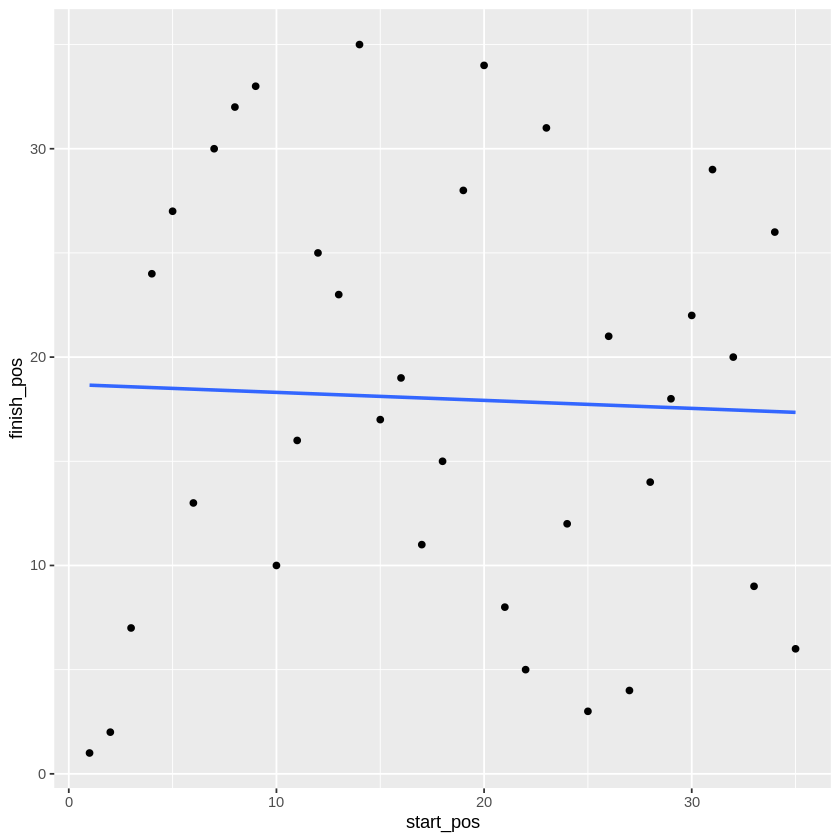

In [ ]:
library(dplyr)
library(ggplot2)

nascard_sr1 %>%
  ggplot(aes(x = start_pos, y = finish_pos)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

Ambas star_pos y finish_pos son variables ordinales, por lo que usa el coeficiente de correlación de Spearman en lugar de Pearson.

Reemplaza los valores de las variables con sus rangos. En este caso, el valor y sus rangos son iguales porque los valores son sus rangos. Luego calcula el coeficiente de correlación de Spearman (ρ) de la misma manera que Pearson:

$$ \hat{\rho} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2 \sum_{i=1}^{n}(Y_i - \bar{Y})^2}} = -0.0384 $$

In [ ]:
x <- rank(nascard_sr1$start_pos)
y <- rank(nascard_sr1$finish_pos)

(rho = sum((x - mean(x)) * (y - mean(y))) /
   sqrt(sum((x - mean(x))^2) * sum((y - mean(y))^2)))

[1] -0.03837535

In [ ]:
n <- nrow(nascard_sr1)
(z = rho * sqrt(n-2) / sqrt(1 - rho^2))

[1] -0.2206121

In [ ]:
pt(q = abs(z), df = n-2, lower.tail = FALSE) * 2

[1] 0.8267537

In [ ]:
cor.test(x = nascard_sr1$start_pos,
         y = nascard_sr1$finish_pos,
         alternative = "two.sided",
         method = "spearman")


	Spearman's rank correlation rho

data:  nascard_sr1$start_pos and nascard_sr1$finish_pos
S = 7414, p-value = 0.8264
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03837535 


## Tau de Kendall

El coeficiente de correlación de rango de Kendall (Tau de Kendall) mide la relación entre variables clasificadas. Sean $ (X_i, Y_i) $ los rangos de las $ n $ parejas de la muestra. Para cada $ X_i $, cuenta $ Y > X_i $. El recuento total es $ k $. Kendall's tau se calcula mediante la fórmula:

$$\hat{\tau} = \frac{4k}{n(n-1)} - 1 $

Ten en cuenta que si $ X $ e $ Y $ tienen el mismo orden de clasificación, $ \hat{\tau} = 1 $, y si tienen órdenes de clasificación opuestos, $ \hat{\tau} = -1 $.

Prueba $ H_0: \tau = 0 $ con la estadística de prueba $ Z = \frac{\hat{\tau} \cdot 9n(n-1)}{2(2n+5)} $. Como prueba no paramétrica, Tau de Kendall no produce un intervalo de confianza.

**Ejemplo utilizando el Tau de Kendall:**
Del conjunto de datos "nascard" mencionado anteriormente, en la carrera 1 de 1975, ¿cuál fue la correlación entre la posición de inicio del conductor (start_pos) y la posición de finalización (finish_pos)?

Nuevamente, dado que tanto start_pos como finish_pos son variables ordinales, usamos una prueba no paramétrica. Esta vez, usamos el Tau de Kendall.

Para cada observación, cuenta el número de otras observaciones donde tanto start_pos como finish_pos son mayores. La suma es $ k = 293 $. Luego, calcula Tau de Kendall como $ \hat{\tau} = \frac{4 \cdot 293}{35(35-1)} - 1 = -0.0151 $.

In [ ]:
cor.test(x = nascard_sr1$start_pos,
         y = nascard_sr1$finish_pos,
         alternative = "two.sided",
         method = "kendall")


	Kendall's rank correlation tau

data:  nascard_sr1$start_pos and nascard_sr1$finish_pos
T = 293, p-value = 0.9102
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.01512605 
